#### Import data and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [2]:
housingdf= pd.read_csv('Train.csv')

In [3]:
housingdf.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


#### Insights / Summary

1. This dataset is about the house prices of different cities in India. The dataset has 12 columns including the target column 'Price'. There is no missing values. This dataset depicts how the TARGET PRICE is affected by other columns. 


2. RERA(Real Estate Regulation and Development Act) has came in to effect after 2016 May, as we do not know the year of the construction, we cannot find whether the particular property should be verified by RERA or not. The RERA approval for the property constructed after 2016 is very necessary. Very few homes are RERA approved so they may be newly constructed.

3. Majority (84%) of the houses are already constructed (For the Resale). 2074 houses are totally new construction
3916 houses are under-construction which are for resale.


4. About 93% of total houses are of (1,2 and 3) BHK houses, these houses are assumed to be the normal houses. 


5. Excessive rooms (BHK>5): The houses which is more than 5BHK are assumed to be Excessive rooms houses. Only one out of 94 houses is newly constructed, others are on resale. The new house that is under construction is 6 BHK.

6. New construction is typically done on 2-5 BHK houses not on the houses that are above 5 BHK.

7. RK type of house has only one room.

8. Bangalore is the city where houses of every types are found (The houses with 15, 20, 14 etc rooms are only found in Bangalore as per the dataset)


9. Area for the houses with 1,2,3,4 BHK are almost same in all the cities but from 5BHK houses, the area varies considerably as per the cities.

10. The price of house is majorly depend on the area of the house. Apart from the area of the house, the considerable factors are number of rooms, RERA approved.




#### info() and describe()

In [4]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
housingdf.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

No missing values in any column.

In [6]:
housingdf.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


#### Basic Visualization

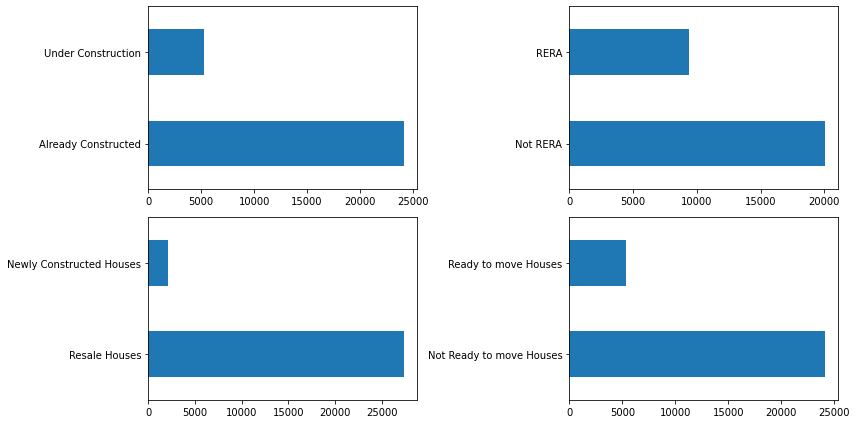

In [7]:
# fig, axs = plt.subplots(nrows=2,ncols=2)

# axs[0,0]=df['READY_TO_MOVE'].value_counts().plot.barh()
# axs[0,1]=df['RESALE'].value_counts().plot.barh()
# axs[1,0]= df['RERA'].value_counts().plot.barh()
# axs[1,1]=df['UNDER_CONSTRUCTION'].value_counts().plot.barh()
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
housingdf['UNDER_CONSTRUCTION'].value_counts().plot.barh()
plt.yticks([0,1],['Already Constructed','Under Construction'])

plt.subplot(2,2,2)
housingdf['RERA'].value_counts().plot.barh()
plt.yticks([0,1],['Not RERA','RERA'])

plt.subplot(2,2,3)
housingdf['RESALE'].value_counts().plot.barh()
plt.yticks([1,0],['Newly Constructed Houses','Resale Houses'])

plt.subplot(2,2,4)
housingdf['READY_TO_MOVE'].value_counts().plot.barh()
plt.yticks([0,1],['Not Ready to move Houses','Ready to move Houses'])

plt.tight_layout()
plt.show()


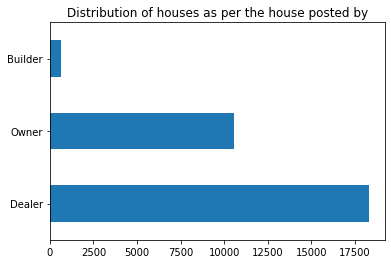

In [8]:
plt.title('Distribution of houses as per the house posted by')
housingdf['POSTED_BY'].value_counts().plot.barh()
plt.show()

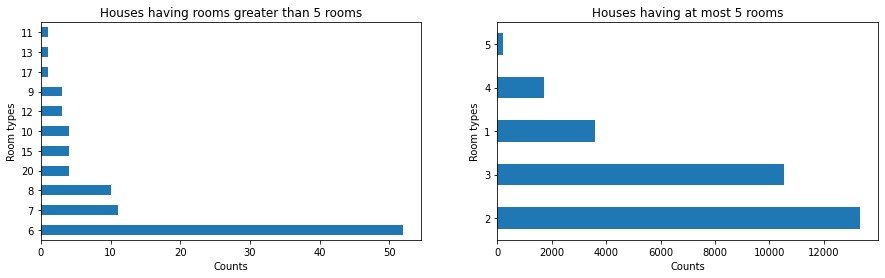

In [9]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Houses having rooms greater than 5 rooms')
plt.xlabel('Counts')
plt.ylabel('Room types')
housingdf[housingdf['BHK_NO.']>5]['BHK_NO.'].value_counts().plot.barh()

plt.subplot(1,2,2)
plt.title('Houses having at most 5 rooms')
plt.xlabel('Counts')
plt.ylabel('Room types')
housingdf[housingdf['BHK_NO.']<=5]['BHK_NO.'].value_counts().plot.barh()

#### Partition on the basis of BHK_NO.

In [10]:
ExcessiveRoomsDF=housingdf[(housingdf['BHK_NO.']>5)]
NormalRoomsDF=housingdf[housingdf['BHK_NO.']<=5]

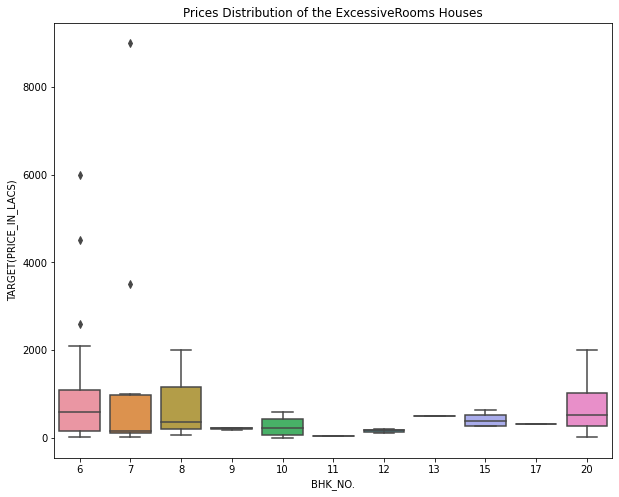

In [11]:
plt.figure(figsize=(10,8))
plt.title('Prices Distribution of the ExcessiveRooms Houses')
sns.boxplot(data=ExcessiveRoomsDF,x='BHK_NO.',y='TARGET(PRICE_IN_LACS)')
plt.show()

In [12]:
#Potential Outliers Details that are seen in the above boxplot
ExcessiveRoomsDF[ExcessiveRoomsDF['TARGET(PRICE_IN_LACS)']>2000]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
6720,Dealer,0,0,6,BHK,5400.016615,1,1,"Adarsh Nagar,Lalitpur",26.906098,75.825254,2600.0
12285,Dealer,0,1,6,BHK,3900.011143,1,1,"Juhu,Maharashtra",19.102600,72.824300,2100.0
12834,Dealer,0,0,6,BHK,6000.000000,1,1,"Shiv Sagar Estate,Maharashtra",19.098373,72.846220,6000.0
16297,Dealer,0,0,6,BHK,4200.033600,1,1,"Malabar Hill,Lalitpur",18.951632,72.798626,4500.0
20915,Dealer,0,0,7,BHK,10000.000000,1,1,"Pali Hill,Lalitpur",24.480000,78.420000,3500.0
24735,Dealer,0,0,7,BHK,8199.932578,1,1,"Breach Candy,Lalitpur",18.972317,72.806327,9000.0


From the boxplot and filtered DataFrame, it is seen that the expensive houses are in Lalitpur(4 houses out of 6), Lalitpur can be a posh area

In [13]:
ExcessiveRoomsDF[(ExcessiveRoomsDF['RESALE']==0)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1289,Dealer,0,0,6,BHK,11263.15789,1,0,"Sathya Sai Layout,Bangalore",12.929162,77.629041,1070.0


This is only the house which lies under the Excessive rooms category and is under construction. Other houses from this category are already constructed.

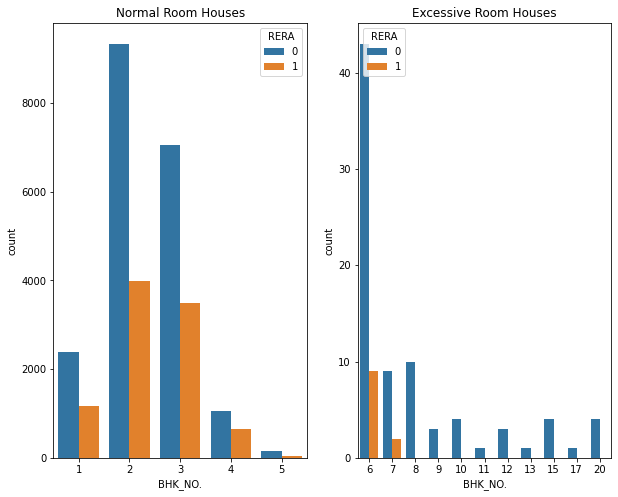

In [14]:

#Distribution of the Normal and Excessive room houses by RERA

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title('Normal Room Houses')
sns.countplot(x=NormalRoomsDF['BHK_NO.'],hue=NormalRoomsDF['RERA'])

plt.subplot(1,2,2)
plt.title('Excessive Room Houses')
sns.countplot(x=ExcessiveRoomsDF['BHK_NO.'],hue=ExcessiveRoomsDF['RERA'])
plt.show()

For RERA, mostly(80%) new construction homes are getting RERA Real Estate Regulation Act whereas (30%) of the resale houses got RERA. We can infer that the RERA is introduced recently (2016) or to get RERA requires some prerequsites which aren't being satisfied by majority of resale houses (Resale houses will be constructed before 2016).

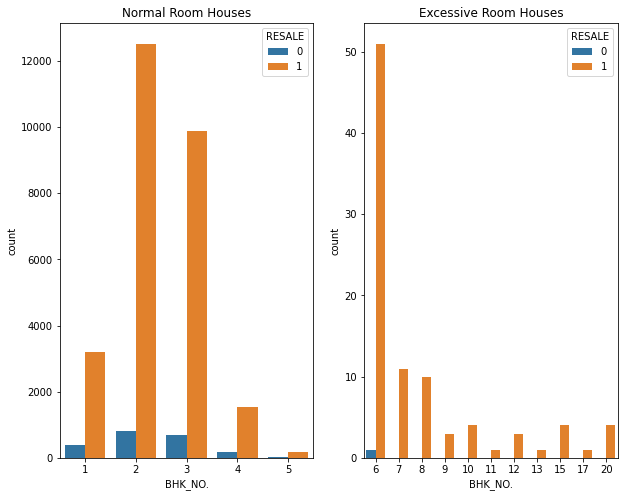

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title('Normal Room Houses')
sns.countplot(x=NormalRoomsDF['BHK_NO.'],hue=NormalRoomsDF['RESALE'])

plt.subplot(1,2,2)
plt.title('Excessive Room Houses')
sns.countplot(x=ExcessiveRoomsDF['BHK_NO.'],hue=ExcessiveRoomsDF['RESALE'])

Excessive rooms (BHK>5)

Only one out of 94 houses is newly constructed, others are on resale. The new house that is under construction is 6 BHK. 

New construction is typically done on 2-5 BHK houses, not on the houses that are above 5 BHK.

Normal rooms (1,2,3 BHK)

About 93% of total houses are of (1,2 and 3) BHK houses.  

#### Grouping and Corelation

In [16]:
housingdf.groupby(['RESALE','RERA','BHK_NO.'])['SQUARE_FT','TARGET(PRICE_IN_LACS)'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


SQUARE_FT  TARGET(PRICE_IN_LACS)
RESALE RERA BHK_NO.                                     
0      0    1          528.700906                   23.6
            2          948.572235                   37.0
            3         1440.067768                   66.9
            4         2637.172500                  210.0
            5         3375.000000                  550.0
            6        11263.157890                 1070.0
       1    1          444.672106                   46.0
            2          766.214450                   59.6
            3         1315.055648                  100.0
            4         2305.394354                  180.0
            5         4241.228071                  340.0
1      0    1          602.873268                   28.0
            2         1043.296818                   45.0
            3         1530.054645                   76.0
            4         2577.403606                  200.0
            5         3577.197949                  300.0
            6         3550.032728                  500.0
            7         3563.596491                  180.0
            8         3994.224984                  375.0
            9         5866.666667                  220.0
            10        5928.370066                  227.5
            11        4000.000000                   55.0
            12        4824.561404                  180.0
            13       10460.251050                  500.0
            15        6947.368421                  390.0
            17       11000.343760                  320.0
            20        9491.561180                  530.0
       1    1          625.000000                   39.0
            2         1057.674361                   60.3
            3         1600.492459                   89.7
            4         2594.951640                  190.0
            5         4888.888889                  420.0
            6         3500.063638                 1100.0
            7        24384.404926                  140.0

The area with respect to the corresponding BHK, for RERA approved newly constructed houses, the area is less than the area of houses that are not under RERA whereas the Resale RERA approved houses have more area than the houses which are not approved and the prices of RERA approved house is more comparatively to the ones not approved till 5BHK.  Coincidence?


In [17]:
housingdf[(housingdf['RESALE']==0) & (housingdf['BHK_NO.']==4) & (housingdf['TARGET(PRICE_IN_LACS)']>200)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
93,Dealer,1,1,4,BHK,1725.490196,0,0,"Deonar,Maharashtra",19.049513,72.919204,440.0
123,Dealer,1,1,4,BHK,1304.034182,0,0,"Kanchpada,Maharashtra",18.960000,72.820000,470.0
669,Dealer,1,1,4,BHK,1429.272351,0,0,"Worli,Lalitpur",19.016700,72.816700,670.0
1619,Builder,1,1,4,BHK,6363.636364,0,0,"Savarkar Nagar,Maharashtra",20.013202,73.753094,350.0
2269,Dealer,0,0,4,BHK,1941.176471,1,0,"Worli,Maharashtra",19.016700,72.816700,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27600,Dealer,0,1,4,BHK,3428.571429,1,0,"Mahalaxmi,Lalitpur",24.690280,78.418890,1680.0
27872,Dealer,0,1,4,BHK,3428.571429,1,0,"Mahalaxmi,Maharashtra",18.978006,72.806154,1680.0
28477,Dealer,1,1,4,BHK,1449.557560,0,0,"Worli,Maharashtra",19.016700,72.816700,670.0
28540,Builder,0,1,4,BHK,1228.277682,1,0,"Sopan Baug,Maharashtra",18.960000,72.820000,270.0


As address contains tones of different value, the name of city is extracted from address. Since there is no specific pattern in the address, the city names are not extracted as per the expectations.

In [18]:
housingdf['cities']=housingdf['ADDRESS'].str.split(',').str[1]

In [19]:
housingdf['ADDRESS']

0                    Ksfc Layout,Bangalore
1                Vishweshwara Nagar,Mysore
2                         Jigani,Bangalore
3              Sector-1 Vaishali,Ghaziabad
4                         New Town,Kolkata
                       ...                
29446                 Shamshabad Road,Agra
29447    E3-108, Lake View Recidency,,Vapi
29448                    Ajmer Road,Jaipur
29449               Sholinganallur,Chennai
29450                     Jagatpura,Jaipur
Name: ADDRESS, Length: 29451, dtype: object

In [20]:
housingdf['cities'].value_counts()

Bangalore                4319
Lalitpur                 2987
Mumbai                   2020
Pune                     1984
Noida                    1765
                         ... 
 Pune Solapur Highway       1
Sabarkantha                 1
 Kanpur Road                1
 Machabollaram              1
Rajpura                     1
Name: cities, Length: 433, dtype: int64

To get the idea on the houses that are in top cities

In [22]:
topcitieshouses = housingdf[housingdf['cities'].isin(['Bangalore','Lalitpur','Mumbai','Pune','Noida'])]

In [23]:
plt.figure(figsize=(10,9))
topcitieshouses.groupby(['BHK_NO.','cities'])['SQUARE_FT','TARGET(PRICE_IN_LACS)'].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


SQUARE_FT  TARGET(PRICE_IN_LACS)
BHK_NO. cities                                        
1       Bangalore    644.038294                   38.0
        Lalitpur     621.388598                   55.0
        Mumbai       615.146832                   57.0
        Noida        550.161812                   23.0
        Pune         610.023618                   33.0
2       Bangalore   1135.073780                   59.5
        Lalitpur    1013.282473                  110.0
        Mumbai      1009.693053                  120.0
        Noida       1069.976827                   50.0
        Pune        1018.079691                   63.0
3       Bangalore   1600.224593                   99.0
        Lalitpur    1466.781708                  230.0
        Mumbai      1482.294732                  240.0
        Noida       1612.339534                   85.0
        Pune        1537.172354                  110.0
4       Bangalore   3000.000000                  250.0
        Lalitpur    2574.959945                  700.0
        Mumbai      2414.741610                  590.0
        Noida       2850.276076                  180.0
        Pune        2883.922134                  240.0
5       Bangalore   4928.172495                  500.0
        Lalitpur    3331.202710                  705.0
        Mumbai      2525.030869                  785.0
        Noida       4500.160720                  290.0
        Pune        5500.146671                  550.0
6       Bangalore   7500.000000                 1070.0
        Lalitpur    3750.031819                 1290.0
        Mumbai      3499.981579                  950.0
        Noida      10050.251260                 1200.0
        Pune        4995.004995                  600.0
7       Bangalore   4652.959379                  590.0
        Lalitpur    9099.966289                 6250.0
8       Bangalore   2160.000000                  310.0
        Lalitpur    6600.006600                 2000.0
        Mumbai      6600.006600                 2000.0
        Pune        7097.321636                  900.0
9       Bangalore   1313.580968                  180.0
10      Bangalore   4490.000000                  485.0
12      Bangalore   4824.561404                  110.0
13      Bangalore  10460.251050                  500.0
15      Bangalore  15001.153930                  650.0
20      Bangalore   7000.000000                  350.0

<Figure size 720x648 with 0 Axes>

Area for the houses with 1,2,3,4 BHK are almost same in all the cities but from 5BHK houses, the area varies considerably as per the cities.

#### Heatmap and Scatterplot

In [24]:
#corrHousingDF = housingdf.drop(columns=['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.','SQUARE_FT','READY_TO_MOVE', 'RESALE','TARGET(PRICE_IN_LACS)', 'cities'])


corrHousingDF = housingdf.drop(columns=['BHK_OR_RK','LONGITUDE','LATITUDE','ADDRESS'])

In [25]:
corrHousingDF

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),cities
0,Owner,0,0,2,1300.236407,1,1,55.0,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,51.0,Mysore
2,Owner,0,0,2,933.159722,1,1,43.0,Bangalore
3,Owner,0,1,2,929.921143,1,1,62.5,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,2500.000000,1,1,45.0,Agra
29447,Owner,0,0,2,769.230769,1,1,16.0,Lake View Recidency
29448,Dealer,0,0,2,1022.641509,1,1,27.1,Jaipur
29449,Owner,0,0,2,927.079009,1,1,67.0,Chennai


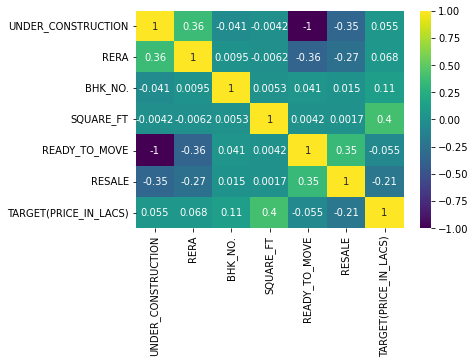

In [26]:
sns.heatmap(corrHousingDF.corr(),annot=True,cmap='viridis')

The Area plays a major role in affecting the price as per the heatmap but the city in which the house is located affects the price as well.

'RESALE' is a negative affecting value which makes sense as the house would be RESALE, the price will be lower. Same effect is also captured for READY_TO_MOVE.

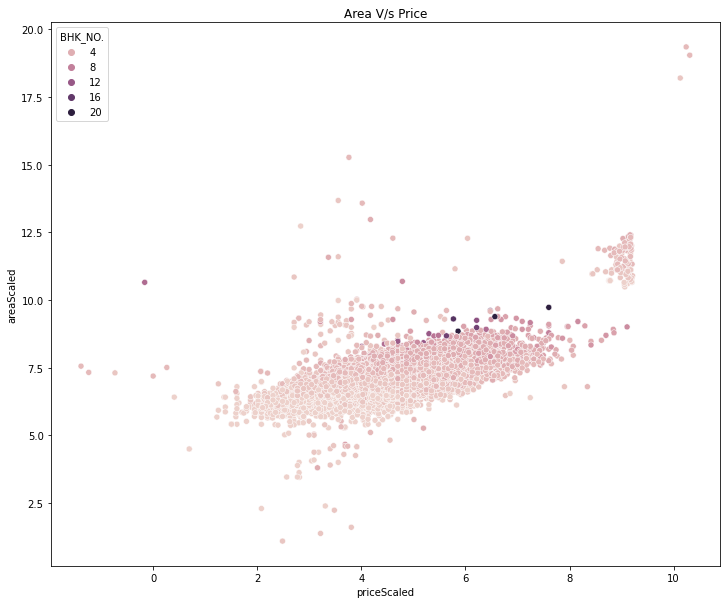

In [27]:
# corrHousingDF['priceScaled'] =  (corrHousingDF['TARGET(PRICE_IN_LACS)']-corrHousingDF['TARGET(PRICE_IN_LACS)'].min())/(corrHousingDF['TARGET(PRICE_IN_LACS)'].max()-corrHousingDF['TARGET(PRICE_IN_LACS)'].min())
# corrHousingDF['areaScaled'] = (corrHousingDF['SQUARE_FT']-corrHousingDF['SQUARE_FT'].min())/(corrHousingDF['SQUARE_FT'].max()-corrHousingDF['SQUARE_FT'].min())
corrHousingDF['priceScaled'] = np.log(corrHousingDF['TARGET(PRICE_IN_LACS)'])
corrHousingDF['areaScaled']= np.log(corrHousingDF['SQUARE_FT'])
plt.figure(figsize=(12,10))
plt.title('Area V/s Price')
sns.scatterplot(data=corrHousingDF,x='priceScaled',y='areaScaled',hue='BHK_NO.')
#sns.scatterplot(data=corrHousingDF,x='TARGET(PRICE_IN_LACS)',y='SQUARE_FT')
plt.show()

The relation between normal values of Price and area wasn't clear because of the scaling, after applying the log, the relation is little linear, more scattered.

# Running Regression

In [5]:
housingdf.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
# Here the Maharshtra is a state but the values which got citynames as Maharashtra that are located in Mumbai,
# so any house in Maharashtra as cityname is Tier 1
tier1 = ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune','Maharashtra']

tier2 = 'Agra, Ajmer, Aligarh, Amravati, Amritsar, Asansol, Aurangabad, Bareilly, Belgaum, Bhavnagar, Bhiwandi, Bhopal, Bhubaneswar, Bikaner, Bilaspur, Bokaro Steel City, Chandigarh, Coimbatore, Cuttack, Dehradun, Dhanbad, Bhilai, Durgapur, Erode, Faridabad, Firozabad, Ghaziabad, Gorakhpur, Gulbarga, Guntur, Gwalior, Gurugram, Guwahati, Hamirpur, Hubli–Dharwad, Indore, Jabalpur, Jaipur, Jalandhar, Jalgaon, Jammu, Jamnagar, Jamshedpur, Jhansi, Jodhpur, Kakinada, Kannur, Kanpur, Karnal, Kochi, Kolhapur, Kollam, Kozhikode, Kurnool, Ludhiana, Lucknow, Madurai, Malappuram, Mathura, Mangalore, Meerut, Moradabad, Mysore, Nagpur, Nanded, Nashik, Nellore, Noida, Patna, Puducherry, Purulia, Prayagraj, Raipur, Rajkot, Rajamahendravaram, Ranchi, Rourkela, Ratlam, Salem, Sangli, Shimla, Siliguri, Solapur, Srinagar, Surat, Thanjavur, Thiruvananthapuram, Thrissur, Tiruchirappalli, Tirunelveli, Tiruvannamalai, Ujjain, Vijayapura, Vadodara, Varanasi, Vasai-Virar City, Vijayawada, Visakhapatnam, Vellore, Warangal'
tier2 = tier2.split(', ')

In [4]:
housingdf['citynames']=housingdf['ADDRESS'].str.rsplit(',').str[1]
housingdf['citynames']

0                   Bangalore
1                      Mysore
2                   Bangalore
3                   Ghaziabad
4                     Kolkata
                 ...         
29446                    Agra
29447     Lake View Recidency
29448                  Jaipur
29449                 Chennai
29450                  Jaipur
Name: citynames, Length: 29451, dtype: object

In [5]:
# Classification of the cities as per the tier level, Total tier = 3
def returntier(city):
    if city in tier1:
        return('Tier1')
    elif city in tier2:
        return('Tier2')
    else:
        return('Tier3')

In [6]:
housingdf['tier'] = housingdf['citynames'].apply(lambda x: returntier(x))

In [8]:
newdf = housingdf[['POSTED_BY', 'BHK_NO.',
       'SQUARE_FT', 'RESALE', 'TARGET(PRICE_IN_LACS)','tier']]
newdf.head()

,POSTED_BY,BHK_NO.,SQUARE_FT,RESALE,TARGET(PRICE_IN_LACS),tier
0,Owner,2,1300.236407,1,55.0,Tier1
1,Dealer,2,1275.000000,1,51.0,Tier2
2,Owner,2,933.159722,1,43.0,Tier1
3,Owner,2,929.921143,1,62.5,Tier2
4,Dealer,2,999.009247,1,60.5,Tier1


In [10]:
newdf=pd.get_dummies(newdf,['POSTED_BY','tier'])
newdf.drop(columns=['POSTED_BY_Owner','tier_Tier3'],inplace=True,axis=1)
newdf.head()

,BHK_NO.,SQUARE_FT,RESALE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,tier_Tier1,tier_Tier2
0,2,1300.236407,1,55.0,0,0,1,0
1,2,1275.000000,1,51.0,0,1,0,1
2,2,933.159722,1,43.0,0,0,1,0
3,2,929.921143,1,62.5,0,0,0,1
4,2,999.009247,1,60.5,0,1,1,0


In [11]:
newdf['logPrice'] = np.log(newdf['TARGET(PRICE_IN_LACS)'])
newdf['logArea'] = np.log(newdf['SQUARE_FT'])
newdf.drop(columns=['TARGET(PRICE_IN_LACS)','SQUARE_FT'],axis=1,inplace=True)

In [ ]:
sns.pairplot(newdf,hue='RESALE')

<AxesSubplot:>

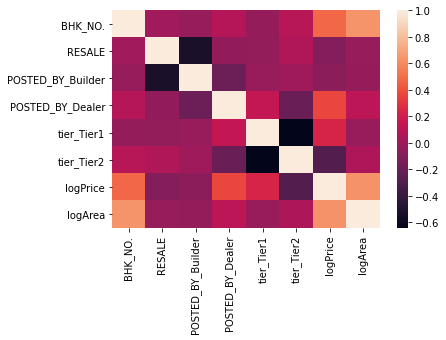

In [12]:
sns.heatmap(newdf.corr())

In [13]:
#X = newdf[[]]
X=newdf[['BHK_NO.', 'RESALE', 'POSTED_BY_Builder', 'POSTED_BY_Dealer',
       'tier_Tier1', 'tier_Tier2', 'logArea']]
y= newdf[['logPrice']]

In [14]:

import statsmodels.api as smf
#features = ['BHK_NO.', 'SQUARE_FT', 'RESALE']
olsmodel3 = smf.OLS(y,X).fit()
print(olsmodel3.summary())

                                 OLS Regression Results                                
Dep. Variable:               logPrice   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          2.172e+05
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:29:02   Log-Likelihood:                         -26418.
No. Observations:               29451   AIC:                                  5.285e+04
Df Residuals:                   29444   BIC:                                  5.291e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Since the Heatmap and the OLS report depicts the positive relation of BHK_NO., POSTED_BY_Dealer, tier1, logArea and the negative relation of remaining features, there is no multi-collinearity. So we are processing the Linear Regression model on the basis of this features.

In [15]:
# "Code taken from Prof. McGraw's Lecture"
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 23,560
Test sample: 5,891


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def regressfun(x,y, regmodel):
    regmodel=regmodel
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('model', regmodel)
    ])
    return(modeling_pipeline.fit(x,y))
m= regressfun(X_train,y_train,LinearRegression())
m

Pipeline(steps=[('scaling', StandardScaler()), ('model', LinearRegression())])

In [19]:
preds = m.predict(X_test)

In [25]:
def plotscatter(preds,y_test):
    plt.figure(figsize=(10,8))
    plt.title('Predictions vs Actual')
    plt.xlabel('Predictions')
    plt.ylabel('Actual')
    plt.scatter(preds,y_test)
    plt.show()

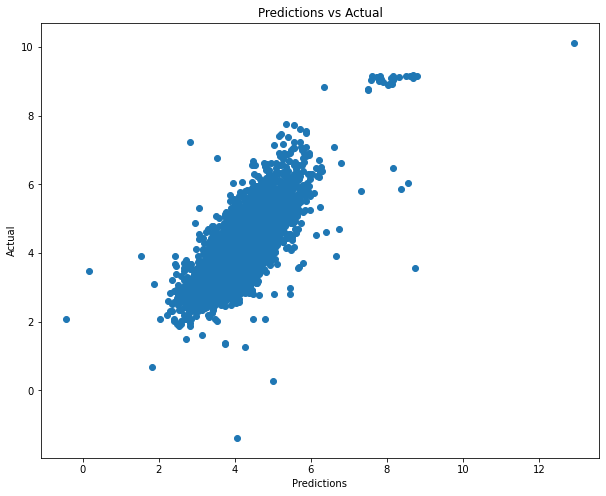

In [49]:
plotscatter(preds,y_test)

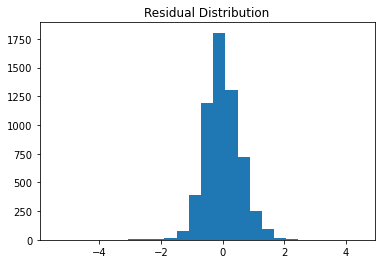

In [46]:

yhat_residuals = y_test - preds

plt.hist(yhat_residuals, bins=25)
plt.title('Residual Distribution')
plt.show()

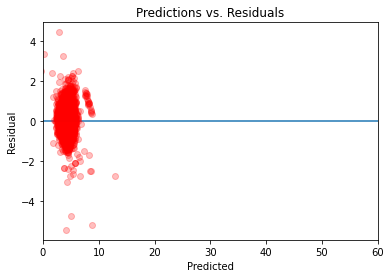

In [47]:
plt.plot(preds, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,60)
plt.xlim(0,60)
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

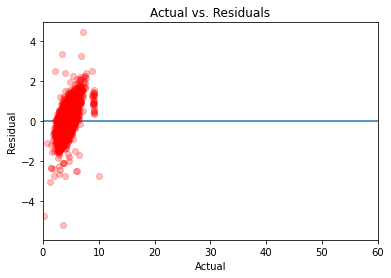

In [48]:
plt.plot(y_test, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,60)
plt.xlim(0,60)
plt.title('Actual vs. Residuals')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

### Insight
The score on test data that we got is considerable less than train data.

The prediction has residual ranging from -4 to 4, since it is log values, it will be seen as relatively lower values.

